#**FIRST_TEST**

#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define column names for the MONK's dataset
columns = ["class", "a1", "a2", "a3", "a4", "a5", "a6", "id"]

def load_monks_data(filename):
    # Read the file, handling irregular whitespace
    df = pd.read_csv(filename, sep=' ', skipinitialspace=True, names=columns)
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    X = df.drop(columns=['class'])
    y = df['class']
    return X, y

In [21]:
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curves(model_params, X_train, y_train, X_test, y_test, title, epochs=300):
    """
    Trains a model manually using partial_fit to track MSE and Accuracy 
    per epoch for both training and test sets. Handles 'lbfgs' by switching 
    to 'adam' for visualization.
    """
    params = model_params.copy()
    
    # Check if the solver is lbfgs and switch to adam for visualization
    if params.get('solver') == 'lbfgs':
        print(f"INFO: Solver 'lbfgs' used in {title} does not support incremental tracking.")
        print("Temporarily switching to 'adam' for plotting purposes.")
        params['solver'] = 'adam'
        # Set a default learning rate if not present
        if 'learning_rate_init' not in params:
            params['learning_rate_init'] = 0.001

    # Remove parameters not used by partial_fit
    if 'max_iter' in params: del params['max_iter']
    
    model = MLPClassifier(**params, random_state=42)
    classes = np.unique(y_train)

    train_mse, test_mse = [], []
    train_acc, test_acc = [], []

    for epoch in range(epochs):
        model.partial_fit(X_train, y_train, classes=classes)
        
        # Calculate MSE (using probabilities for a smooth curve)
        train_proba = model.predict_proba(X_train)[:, 1]
        test_proba = model.predict_proba(X_test)[:, 1]
        train_mse.append(mean_squared_error(y_train, train_proba))
        test_mse.append(mean_squared_error(y_test, test_proba))

        # Calculate Accuracy
        train_acc.append(accuracy_score(y_train, model.predict(X_train)))
        test_acc.append(accuracy_score(y_test, model.predict(X_test)))

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    
    # MSE Plot
    ax1.plot(train_mse, label='Train MSE', color='blue', alpha=0.8)
    ax1.plot(test_mse, label='Test MSE', color='red', alpha=0.8)
    ax1.set_title(f'{title}: Loss (MSE) Curve')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('MSE')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy Plot
    ax2.plot(train_acc, label='Train Accuracy', color='blue', alpha=0.8)
    ax2.plot(test_acc, label='Test Accuracy', color='red', alpha=0.8)
    ax2.set_title(f'{title}: Accuracy Curve')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [4]:
def visualize_results(results_df, title):
    # Clean up column names for easier plotting
    plot_df = results_df.copy()
    plot_df['Hidden Layers'] = plot_df['param_hidden_layer_sizes'].astype(str)
    plot_df['Alpha'] = plot_df['param_alpha']
    plot_df['Solver'] = plot_df['param_solver']
    plot_df['Momentum'] = plot_df['param_momentum']
    plot_df['Accuracy'] = plot_df['mean_test_score']

    # 1. General Accuracy vs Alpha (Regularization)
    plt.figure(figsize=(12, 6))
    # We use 'Solver' as style to distinguish lines
    sns.lineplot(data=plot_df, x='Alpha', y='Accuracy', hue='Hidden Layers', style='Solver', markers=True, dashes=False)
    plt.xscale('log') # Log scale is best for regularization parameters
    plt.title(f'{title}: Accuracy vs Regularization (Alpha)')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.ylabel("Mean CV Accuracy")
    plt.show()

    # 2. Specific Plot for SGD Momentum
    # We filter for only results where solver is 'sgd'
    sgd_df = plot_df[plot_df['Solver'] == 'sgd']

    if not sgd_df.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=sgd_df, x='Momentum', y='Accuracy', hue='Hidden Layers', marker='o')
        plt.title(f'{title}: Effect of Momentum (SGD Solver Only)')
        plt.xlabel("Momentum Value")
        plt.ylabel("Mean CV Accuracy")
        plt.grid(True, alpha=0.5)
        plt.show()

In [5]:
# Load the datasets
# Ensure you have uploaded 'monks-1.train', 'monks-1.test', etc. to the Colab runtime
X_train_raw, y_train = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-1.train')
X_test_raw, y_test = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-1.test')
X_train_raw_2, y_train_2 = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-2.train')
X_test_raw_2, y_test_2 = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-2.test')

# Encoder setup
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
X_train = encoder.fit_transform(X_train_raw)
X_test = encoder.transform(X_test_raw)
X_train_2 = encoder.fit_transform(X_train_raw_2)
X_test_2 = encoder.transform(X_test_raw_2)

print("Data loaded and encoded successfully.")

Data loaded and encoded successfully.


Starting MONK-1 Grid Search... (This might take a minute due to expanded grid)

Best Parameters found for MONK-1:
{'activation': 'tanh', 'alpha': 0, 'hidden_layer_sizes': (4, 4), 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'adam'}
Best Cross-Validation Accuracy: 74.83%
Test Set Accuracy: 100.00%


/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


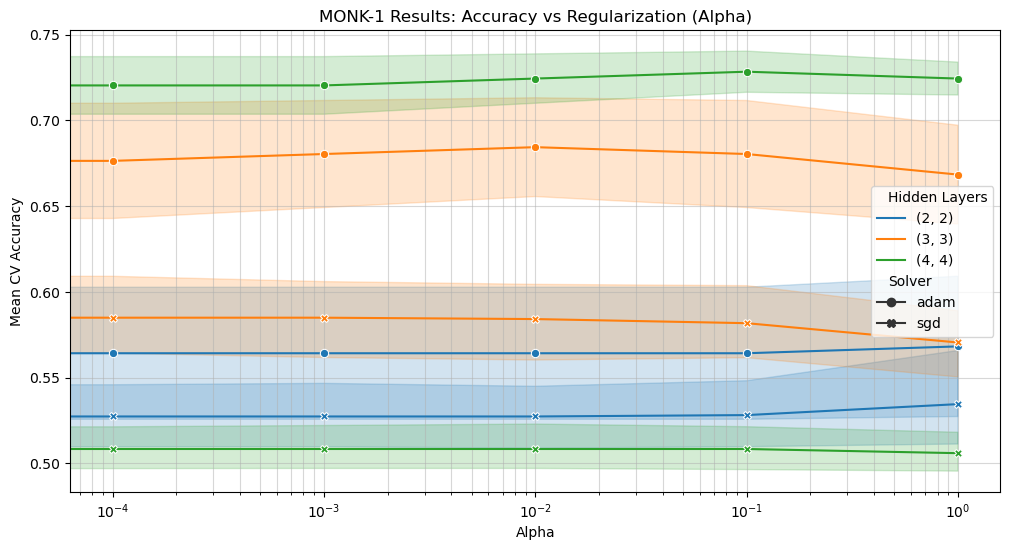

/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


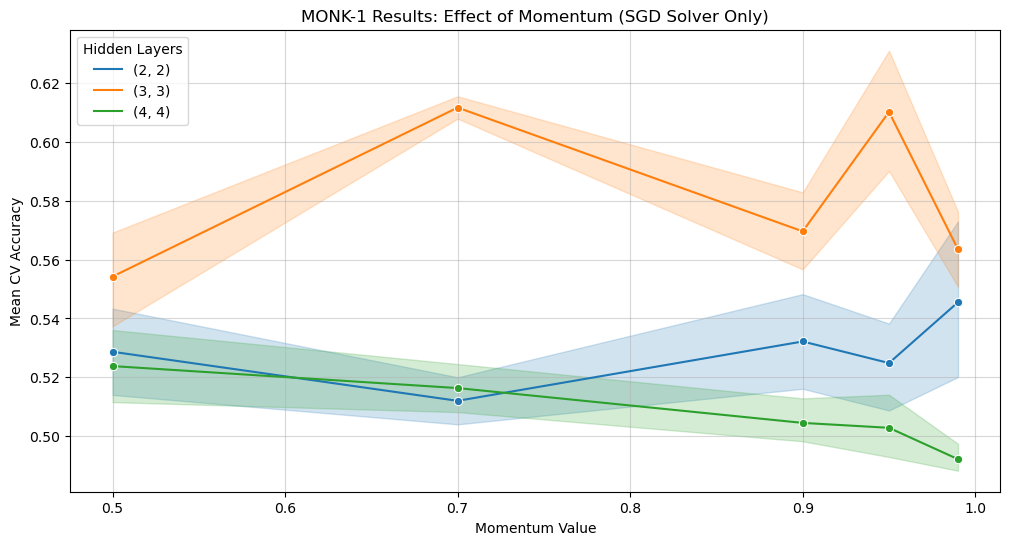

In [6]:
# 1. Define the model (base settings)
# Increased max_iter because SGD often needs more iterations to converge than LBFGS
mlp = MLPClassifier(max_iter=5000, random_state=42)

# 2. Define the UPDATED grid of parameters
param_grid = {
    # Testing different architectures
    'hidden_layer_sizes': [(2, 2), (3, 3), (4, 4)],

    # Activation functions
    'activation': ['relu', 'tanh'],

    # Solvers: Added 'sgd' 'lbfgs',
    'solver': [ 'adam', 'sgd'],

    # Regularization: Expanded range (Logarithmic scale)
    'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1.0],

    # Momentum: Only affects 'sgd'.
    # Note: 'lbfgs' and 'adam' ignore this parameter, but GridSearchCV will still run the combinations.
    'momentum': [0.5, 0.7, 0.9, 0.95, 0.99],

    # Optional: Set learning rate to 'adaptive' to help SGD converge better
    'learning_rate': ['adaptive']
}

# 3. Initialize GridSearchCV
print("Starting MONK-1 Grid Search... (This might take a minute due to expanded grid)")
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("\nBest Parameters found for MONK-1:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2%}")

# Use the best model to predict on test set
best_model = grid_search.best_estimator_
test_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Set Accuracy: {test_acc:.2%}")

# Visualize
visualize_results(pd.DataFrame(grid_search.cv_results_), "MONK-1 Results")

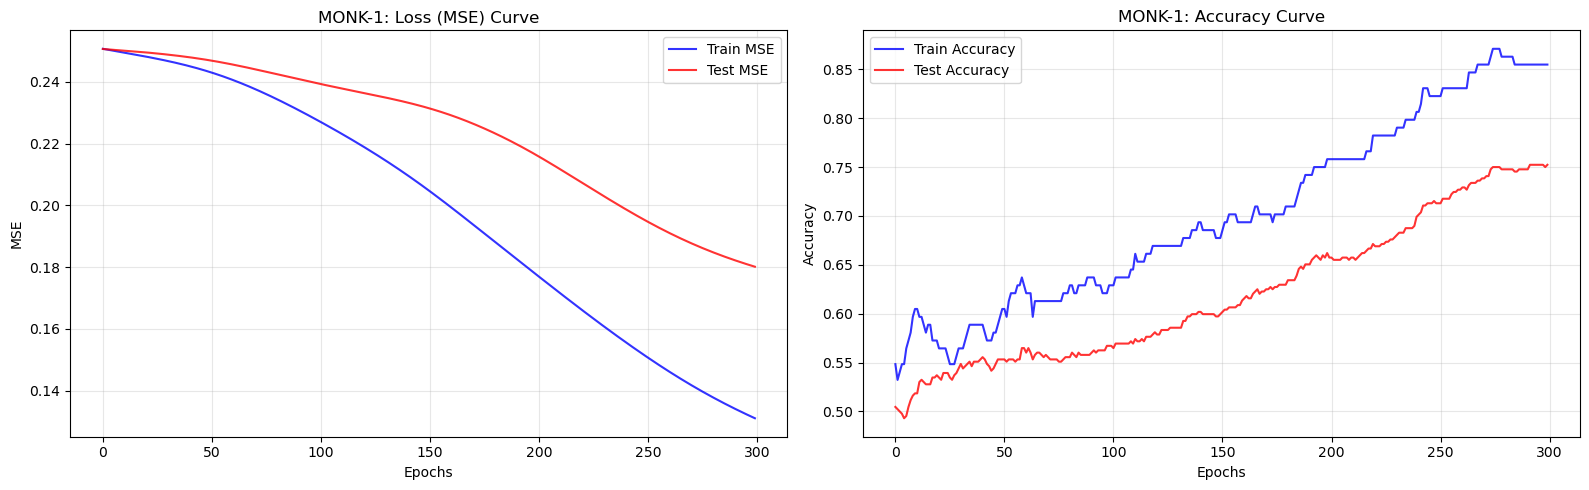

In [24]:
plot_learning_curves(grid_search.best_params_, X_train, y_train, X_test, y_test, "MONK-1")

In [8]:
# Use the best model found to predict on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train, best_model.predict(X_train))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 100.00%
Train Set Accuracy: 100.00%


#**2ND_TEST**

Starting Grid Search... this may take a moment.

Best Parameters found:
{'activation': 'tanh', 'alpha': 0, 'hidden_layer_sizes': (4, 4), 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'adam'}
Best Cross-Validation Accuracy: 100.00%


/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


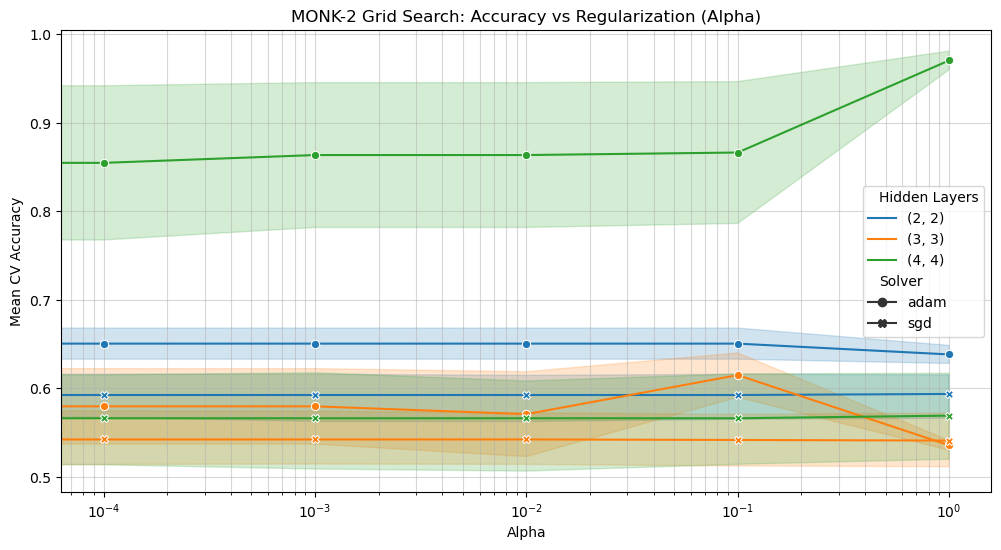

/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


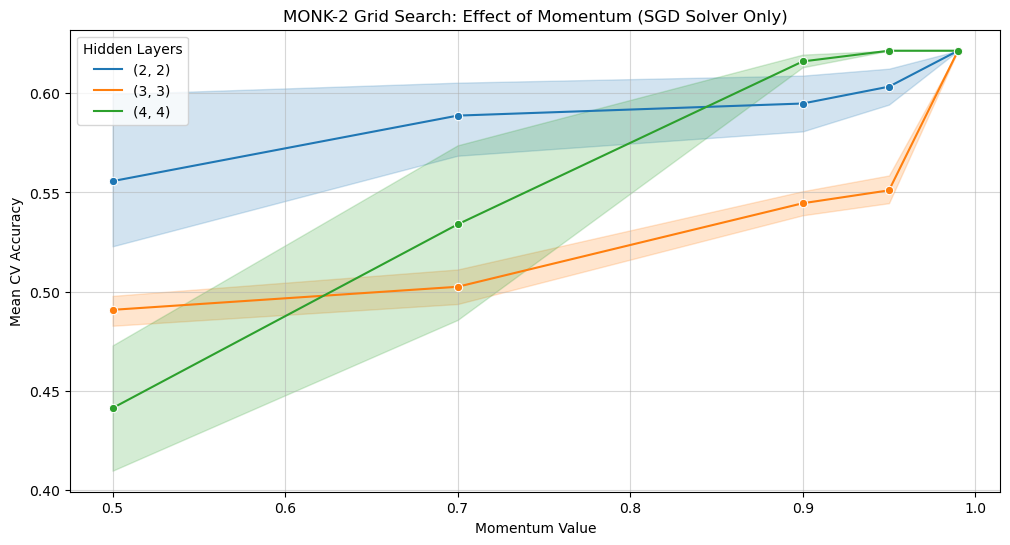

In [9]:
# 3. Initialize GridSearchCV
# cv=5: uses 5-fold cross-validation
# n_jobs=-1: uses all available CPU cores
grid_search_2 = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

print("Starting Grid Search... this may take a moment.")
grid_search_2.fit(X_train_2, y_train_2)

print("\nBest Parameters found:")
print(grid_search_2.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_2.best_score_:.2%}")

visualize_results(pd.DataFrame(grid_search_2.cv_results_), "MONK-2 Grid Search")

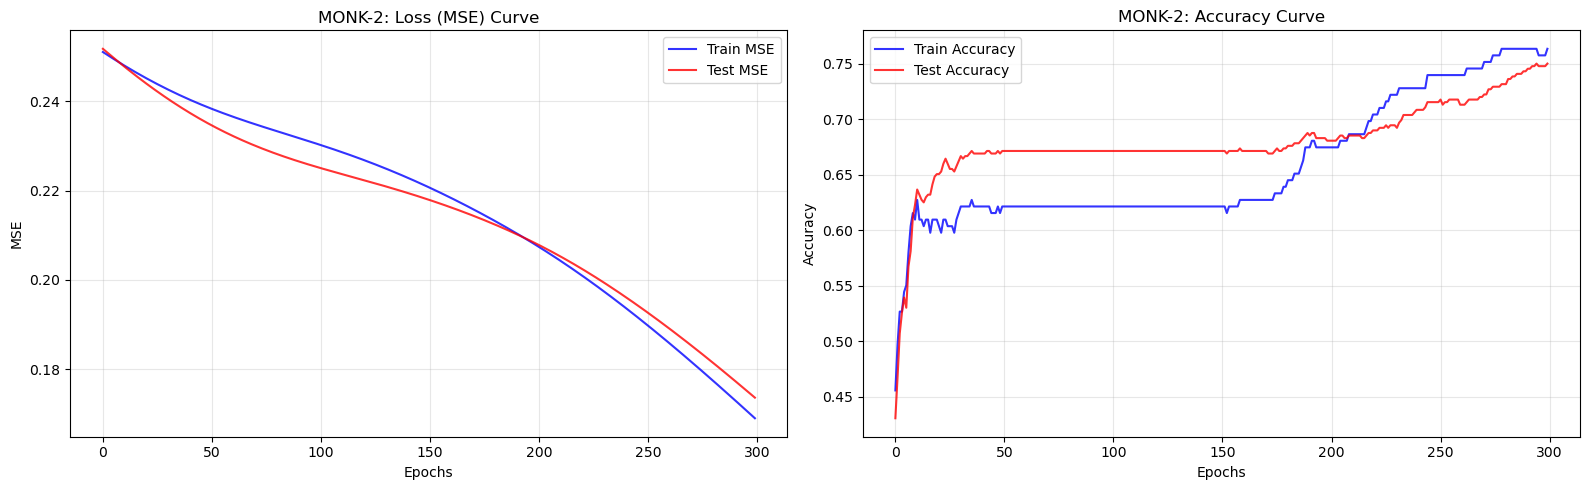

In [23]:
plot_learning_curves(grid_search_2.best_params_, X_train_2, y_train_2, X_test_2, y_test_2, "MONK-2")

In [11]:
# Use the best model found to predict on the test set
best_model_2 = grid_search_2.best_estimator_
test_predictions_2 = best_model_2.predict(X_test_2)
test_acc = accuracy_score(y_test_2, test_predictions_2)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train_2, best_model_2.predict(X_train_2))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 100.00%
Train Set Accuracy: 100.00%


#**LAST_TEST**

In [12]:
# [cite_start]Load the datasets [cite: 36, 1]
X_train_raw_3, y_train_3 = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-3.train')
X_test_raw_3, y_test_3 = load_monks_data('~/Documents/UniPi/1/UNIPI-Machine-Learning-Project/src/data/monk/monks-3.test')

print(f"Loaded {len(X_train_raw_3)} training samples and {len(X_test_raw_3)} test samples.")

Loaded 122 training samples and 432 test samples.


In [13]:
# Create the encoder
# sparse_output=False gives us a standard numpy array we can read easily
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both sets
X_train_3 = encoder.fit_transform(X_train_raw_3)
X_test_3 = encoder.transform(X_test_raw_3)

print(f"Feature shape after encoding: {X_train_3.shape}")

Feature shape after encoding: (122, 17)


In [14]:
param_grid = {
    # Testing different architectures
    'hidden_layer_sizes': [(2, 2), (3, 3), (4, 4)],

    # Activation functions
    'activation': ['relu', 'tanh'],

    # Solvers: Added 'sgd'
    'solver': ['lbfgs', 'adam', 'sgd'],

    # Regularization: Expanded range (Logarithmic scale)
    'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1.0],

    # Momentum: Only affects 'sgd'.
    # Note: 'lbfgs' and 'adam' ignore this parameter, but GridSearchCV will still run the combinations.
    'momentum': [0.5, 0.7, 0.9, 0.95, 0.99],

    # Optional: Set learning rate to 'adaptive' to help SGD converge better
    'learning_rate': ['adaptive']
}

Starting Grid Search... this may take a moment.


/home/debian/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/debian/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/debian/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_


Best Parameters found:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2, 2), 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 92.60%


/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


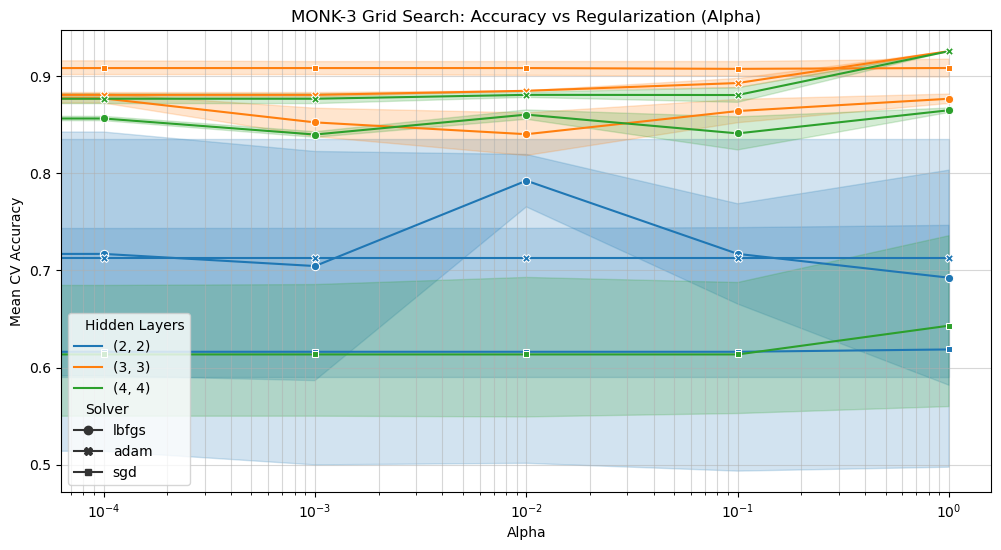

/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/debian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


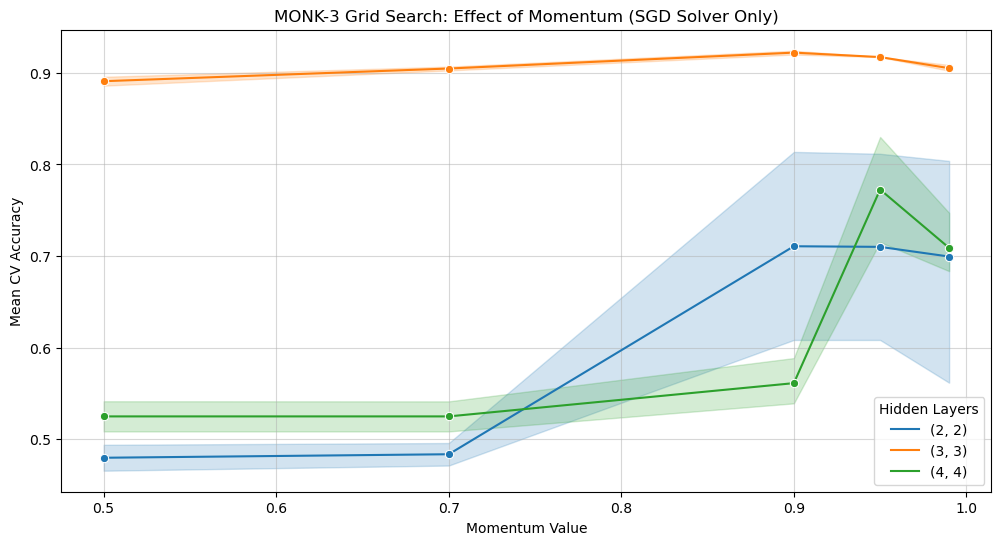

In [15]:
# 3. Initialize GridSearchCV
# cv=5: uses 5-fold cross-validation
# n_jobs=-1: uses all available CPU cores
grid_search_3 = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

print("Starting Grid Search... this may take a moment.")
grid_search_3.fit(X_train_3, y_train_3)

print("\nBest Parameters found:")
print(grid_search_3.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_3.best_score_:.2%}")

visualize_results(pd.DataFrame(grid_search_3.cv_results_), "MONK-3 Grid Search")

INFO: Solver 'lbfgs' used in MONK-3 does not support incremental tracking.
Temporarily switching to 'adam' for plotting purposes.


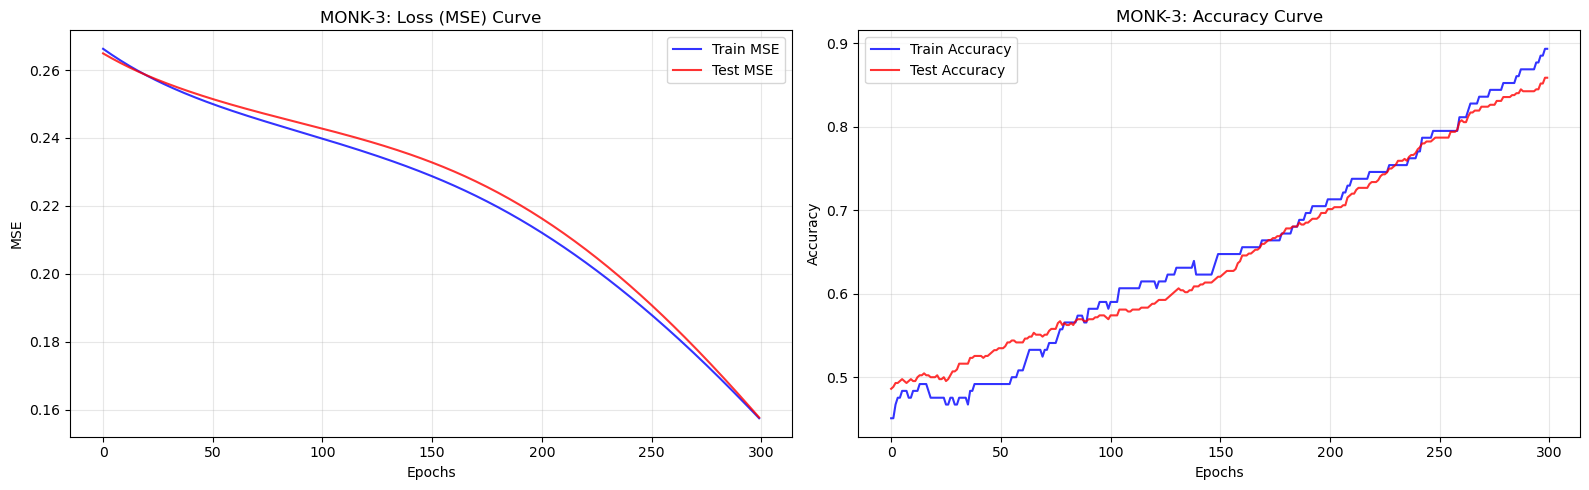

In [22]:
plot_learning_curves(grid_search_3.best_params_, X_train_3, y_train_3, X_test_3, y_test_3, "MONK-3")

In [25]:
# Use the best model found to predict on the test set
best_model_3 = grid_search_3.best_estimator_
test_predictions_3 = best_model_3.predict(X_test_3)
test_acc = accuracy_score(y_test_3, test_predictions_3)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train_3, best_model_3.predict(X_train_3))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 96.53%
Train Set Accuracy: 95.08%
